In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [354]:
data = pd.read_csv("hackathon_data.csv", low_memory=False)
data.drop(data.columns[[0, 11, 12]], axis=1, inplace=True)

data.head()

,Marka,IsyeriTipi,UyeDurum,UyeAdres,Sehir,UyeAktivasyonTarih,IslemID,IslemTarih,IslemTutar,Tercih
0,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,401003136,2015-09-18 14:35:04,5.00,CeptePos
1,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,403526702,2019-04-13 13:31:00,32.70,ÖKC
2,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,403529006,2019-04-13 19:30:00,998.05,ÖKC
3,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,403530803,2019-04-14 13:52:00,105.75,ÖKC
4,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,403531107,2019-04-14 15:09:00,163.00,ÖKC


In [355]:
data = pd.DataFrame(data)

# Convert the "IslemTarih" column to datetime format
data["IslemTarih"] = pd.to_datetime(data["IslemTarih"], format="%Y-%m-%d %H:%M:%S")

# Add a new column for the day of the week
data["DayOfWeek"] = data["IslemTarih"].dt.day_name()

brands = data.Marka.unique()
brands
# Print the updated DataFrame
#data.head()

array(['Kzar kü pazar', 'Teri tejileri', 'Aida aka gida', 'Hdeo he video',
       'Hiye hatasiye', 'Hkek haan kek', 'Wtma waarıtma', 'Ayon arvasyon',
       'Eşti ekd. şti', 'Took tatawook', 'Wsky woversky', 'Ka.ş kiva a.ş',
       'Bant boaurant', 'Asua axaxesua', 'Rimi renetimi', 'Öeti ödirketi',
       'Kayi kol bayi', 'Aüfe ass büfe', 'Biye bakaliye', 'Llım leazılım',
       'Nfka nu yufka', 'Kıda kaz gıda', 'Küfe kar büfe', 'Hs 3 hy sis 3',
       'Aket akmarket', 'Sesi suzanesi', 'Eket ermarket', 'Ezgi ezezgi',
       'Bkal babakkal', 'Örek öz börek', 'Oden o- maden', 'Giye göhafiye',
       'Alik arncilik', 'Mand mad land', 'Blas burillas', 'Bant baaurant',
       'Aziz ab leziz', 'Dkli doymakli', 'Öket özmarket'], dtype=object)

In [356]:
data['IslemTarih'] = pd.to_datetime(data['IslemTarih'])

# Define the time bins
time_bins = [0, 7, 11, 14, 17, 19, 24]  # Custom bins for midnight, morning, afternoon, and evening

# Create labels for the time bins
time_labels = ['Gece', 'Sabah', 'Ogle Arası', 'Mesai', 'Is Cıkıs', 'Aksam']

# Categorize payments into time bins
data['PaymentTimeCategory'] = pd.cut(data['IslemTarih'].dt.hour, bins=time_bins, labels=time_labels)

# Group the data by company_name and PaymentTimeCategory and count the occurrences
grouped = data.groupby(['Marka', 'PaymentTimeCategory']).size().reset_index(name='count')

# Find the time categories at which each company pays the most
most_payment_time_categories = grouped.groupby('Marka')['count'].idxmax()

# Display the results
most_payment_time_categories = grouped.loc[most_payment_time_categories]

# Calculate the total count for each time category
total_count_by_time_category = grouped.groupby('PaymentTimeCategory')['count'].sum().reset_index(name='TotalCount')

# Count how many 'Marka' have their most payment time category for each time category
most_payment_time_categories_count = most_payment_time_categories.groupby('PaymentTimeCategory')['count'].count().reset_index(name='CountOfMarka')

# Print the results
print("\nTotal Count by Time Category:")
print(total_count_by_time_category)
print("\n\n")
print("\nCount of 'Marka' for Each Time Category:")
print(most_payment_time_categories_count)


Total Count by Time Category:
  PaymentTimeCategory  TotalCount
0                Gece       19405
1               Sabah      136317
2          Ogle Arası      222710
3               Mesai      273722
4            Is Cıkıs      179469
5               Aksam      158253




Count of 'Marka' for Each Time Category:
  PaymentTimeCategory  CountOfMarka
0                Gece             0
1               Sabah             8
2          Ogle Arası             6
3               Mesai            15
4            Is Cıkıs             0
5               Aksam            10


In [357]:
# Assuming 'IslemTarih' is already converted to a datetime column

# Extract the day of the week (0 = Monday, 6 = Sunday)
data['DayOfWeek'] = data['IslemTarih'].dt.dayofweek

# Create labels for the days of the week
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Map the day of the week values to day labels
data['DayOfWeekLabel'] = data['DayOfWeek'].map(dict(enumerate(day_labels)))

# Group the data by 'Marka' and 'DayOfWeekLabel' and count the occurrences
grouped_day = data.groupby(['Marka', 'DayOfWeekLabel']).size().reset_index(name='count')

# Find the day of the week at which each company pays the most
most_payment_day = grouped_day.groupby('Marka')['count'].idxmax()

# Display the results
most_payment_day = grouped_day.loc[most_payment_day]

# Calculate the total count for each day of the week
total_count_by_day = grouped_day.groupby('DayOfWeekLabel')['count'].sum().reset_index(name='TotalCount')

# Count how many 'Marka' have their most payment day for each day of the week
most_payment_day_count = most_payment_day.groupby('DayOfWeekLabel')['count'].count().reset_index(name='CountOfMarka')
sum_by_marka_most_payment_day = data[data['Marka'].isin(most_payment_day['Marka'])].groupby(['Marka', 'DayOfWeekLabel'])['IslemTutar'].sum().reset_index(name='TotalIslemTutar')


# Group the data by 'Marka', 'PaymentTimeCategory', and calculate the sum of 'IslemTutar'
sum_by_marka_time_category = data.groupby(['Marka', 'PaymentTimeCategory'])['IslemTutar'].sum().reset_index(name='TotalIslemTutar')

# Merge the 'sum_by_marka_time_category' DataFrame with 'most_payment_time_categories' to include the most payment time categories
result = pd.merge(most_payment_time_categories, sum_by_marka_time_category, on=['Marka', 'PaymentTimeCategory'])

most_payment_day = pd.merge(most_payment_day, sum_by_marka_most_payment_day, on=['Marka', 'DayOfWeekLabel'])

most_payment_day_sum = data.groupby('DayOfWeekLabel')['IslemTutar'].sum().reset_index(name='AmountOfSum')
sum_day = pd.merge(most_payment_day_count, most_payment_day_sum, on=['DayOfWeekLabel'])
sum_day = pd.merge(sum_day, total_count_by_day, on=['DayOfWeekLabel'])

# Create a DataFrame from the data
df = pd.DataFrame(data, columns=['IslemTarih'])

# Convert the 'Timestamp' column to a datetime object
df['IslemTarih'] = pd.to_datetime(df['IslemTarih'])

# Group the data by day
grouped = df.groupby(df['IslemTarih'].dt.date)

# Count the number of data points for each day
payment_count_day_by_day = grouped.size().reset_index(name='Count')

In [358]:
q1 = data['IslemTutar'].quantile(0.25)
q3 = data['IslemTutar'].quantile(0.75)
iqr = q3 - q1
iki_iqr_uzaklik = 1.5 * iqr
data['IslemTutarAnomaly'] = data[~((data.IslemTutar < (q1 - iki_iqr_uzaklik)) | (data.IslemTutar > (q3 + iki_iqr_uzaklik)))]['IslemTutar']
data['IslemTutarAnomaly'] = data['IslemTutarAnomaly'].fillna(0)

In [359]:
currency = pd.read_csv("usd.csv")
currency = currency.drop(columns=["Open", "High", "Low", "Vol.", "Change %"])
currency['Date'] = pd.to_datetime(currency['Date'])
date_range = pd.date_range(start=currency['Date'].min(), end=currency['Date'].max(), freq='D')
full_df = pd.DataFrame({'Date': date_range})
full_df = full_df.merge(currency, on='Date', how='left')
full_df['Price'] = full_df['Price'].fillna(method='ffill')


In [360]:
data['IslemTarih'] = pd.to_datetime(data['IslemTarih'])
data['IslemTarih_Date'] = pd.to_datetime(data['IslemTarih'].dt.date)
data.head()
dolar_kuru = []
full_df = full_df.groupby('Date')['Price'].first().reset_index()
data = data.merge(full_df, how='left', left_on='IslemTarih_Date', right_on='Date')

#data["dolar"] = dolar_kuru
data['DolarTutar'] = data['IslemTutar'] / data['Price']
data.drop(['Price', 'Date'], axis=1, inplace=True)
data.sample(20)


,Marka,IsyeriTipi,UyeDurum,UyeAdres,Sehir,UyeAktivasyonTarih,IslemID,IslemTarih,IslemTutar,Tercih,DayOfWeek,PaymentTimeCategory,DayOfWeekLabel,IslemTutarAnomaly,IslemTarih_Date,DolarTutar
101953,Hdeo he video,Şahıs Şirketi,Pasif,ARMAĞANEVLER MAH. HARMAN SK. NO: 17 İÇ KAPI NO...,İstanbul,2020-09-19 14:13:33,469428268,2022-08-15 19:53:00,100.00,ÖKC,0,Is Cıkıs,Monday,100.0,2022-08-15,5.586467
645220,Eket ermarket,Şahıs Şirketi,Pasif,CUMHURİYET MAH. 1.KARANFİL SK. 60 -2A 1 KÜÇÜKÇ...,İstanbul,2018-03-22 13:33:45,403487743,2019-04-03 20:07:00,16.30,ÖKC,2,Aksam,Wednesday,16.3,2019-04-03,2.897263
39655,Aida aka gida,Tüzel Şirket,Aktif,KOCATEPE MAH. ŞEHİR PARKI CAD NO: 105 İÇ KAPI ...,İstanbul,2014-09-10 12:54:01,534208442,2023-05-09 19:15:00,30.00,ÖKC,1,Is Cıkıs,Tuesday,30.0,2023-05-09,1.536405
938063,Aziz ab leziz,Şahıs Şirketi,Aktif,BULANCAK MAH. ADLİYE SK. NO: 4 BULANCAK/ GİRESUN,Giresun,2018-12-28 15:13:16,502099241,2023-01-26 19:42:00,130.00,ÖKC,3,Is Cıkıs,Thursday,130.0,2023-01-26,6.920047
121774,Hiye hatasiye,Şahıs Şirketi,Pasif,KURTULUŞ MAH. HÜRRİYET BLV. NO: 11 A İÇ KAPI N...,Manisa,2019-07-19 14:53:05,469527254,2022-08-16 15:55:00,180.00,ÖKC,1,Mesai,Tuesday,180.0,2022-08-16,10.036690
883175,Bant baaurant,Tüzel Şirket,Aktif,BAŞARAN CAFE RESTORAN OTOMOTİV VE TARIM ANONİM...,İstanbul,2018-11-24 17:41:17,411163295,2020-09-12 01:12:00,73.00,ÖKC,5,Gece,Saturday,73.0,2020-09-12,9.764058
397465,Nfka nu yufka,Şahıs Şirketi,Aktif,MERKEZ MAH. Ş.YILMAZ ÖZDEMİR CAD. 61 4 KÜÇÜKÇE...,İstanbul,2018-01-26 15:08:50,403629136,2019-05-07 15:36:00,40.00,ÖKC,1,Mesai,Tuesday,40.0,2019-05-07,6.502902
44383,Aida aka gida,Tüzel Şirket,Aktif,KOCATEPE MAH. ŞEHİR PARKI CAD NO: 105 İÇ KAPI ...,İstanbul,2014-09-10 12:54:01,558660627,2023-07-06 09:36:00,35.50,ÖKC,3,Sabah,Thursday,35.5,2023-07-06,1.359575
715559,Bkal babakkal,Şahıs Şirketi,Pasif,BÜYÜKSARAY MEYDANI CAD NO:42,Kocaeli,2018-05-03 16:01:49,403034092,2018-12-02 12:43:00,32.50,ÖKC,6,Ogle Arası,Sunday,32.5,2018-12-02,6.234653
509642,Nfka nu yufka,Şahıs Şirketi,Aktif,MERKEZ MAH. Ş.YILMAZ ÖZDEMİR CAD. 61 4 KÜÇÜKÇE...,İstanbul,2018-01-26 15:08:50,511049750,2023-02-27 14:28:00,150.00,ÖKC,0,Ogle Arası,Monday,150.0,2023-02-27,7.942139


In [361]:
q1 = data['DolarTutar'].quantile(0.25)
q3 = data['DolarTutar'].quantile(0.75)
iqr = q3 - q1
iki_iqr_uzaklik = 1.5 * iqr
data['DolarTutarAnomaly'] = data[~((data.DolarTutar < (q1 - iki_iqr_uzaklik)) | (data.DolarTutar > (q3 + iki_iqr_uzaklik)))]['DolarTutar']
data['DolarTutarAnomaly'] = data['DolarTutarAnomaly'].fillna(0)

In [362]:
data.drop(['DayOfWeek', 'UyeAdres'], axis=1, inplace=True)

Regresyon

In [311]:
data

,Marka,IsyeriTipi,UyeDurum,Sehir,UyeAktivasyonTarih,IslemTarih,IslemTutar,Tercih,PaymentTimeCategory,DayOfWeekLabel,IslemTutarAnomaly,IslemTarih_Date,DolarTutar,DolarTutarAnomaly
0,Kzar kü pazar,Tüzel Şirket,Aktif,Samsun,2015-09-08 15:08:23,2015-09-18 14:35:04,5.00,CeptePos,Ogle Arası,Friday,5.00,2015-09-18,1.663894,1.663894
1,Kzar kü pazar,Tüzel Şirket,Aktif,Samsun,2015-09-08 15:08:23,2019-04-13 13:31:00,32.70,ÖKC,Ogle Arası,Saturday,32.70,2019-04-13,5.667932,5.667932
2,Kzar kü pazar,Tüzel Şirket,Aktif,Samsun,2015-09-08 15:08:23,2019-04-13 19:30:00,998.05,ÖKC,Is Cıkıs,Saturday,0.00,2019-04-13,172.993257,0.000000
3,Kzar kü pazar,Tüzel Şirket,Aktif,Samsun,2015-09-08 15:08:23,2019-04-14 13:52:00,105.75,ÖKC,Ogle Arası,Sunday,105.75,2019-04-14,18.329780,18.329780
4,Kzar kü pazar,Tüzel Şirket,Aktif,Samsun,2015-09-08 15:08:23,2019-04-14 15:09:00,163.00,ÖKC,Mesai,Sunday,163.00,2019-04-14,28.252994,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,Öket özmarket,Şahıs Şirketi,Pasif,Gaziantep,2019-01-31 15:47:21,2023-06-09 21:35:00,16.50,ÖKC,Aksam,Friday,16.50,2023-06-09,0.705173,0.705173
999996,Öket özmarket,Şahıs Şirketi,Pasif,Gaziantep,2019-01-31 15:47:21,2023-06-09 21:44:00,77.00,ÖKC,Aksam,Friday,77.00,2023-06-09,3.290809,3.290809
999997,Öket özmarket,Şahıs Şirketi,Pasif,Gaziantep,2019-01-31 15:47:21,2023-06-09 22:01:00,37.00,ÖKC,Aksam,Friday,37.00,2023-06-09,1.581298,1.581298
999998,Öket özmarket,Şahıs Şirketi,Pasif,Gaziantep,2019-01-31 15:47:21,2023-06-09 22:15:00,80.00,ÖKC,Aksam,Friday,80.00,2023-06-09,3.419023,3.419023


In [194]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Marka                1000000 non-null  object        
 1   IsyeriTipi           1000000 non-null  object        
 2   UyeDurum             1000000 non-null  object        
 3   Sehir                1000000 non-null  object        
 4   UyeAktivasyonTarih   1000000 non-null  object        
 5   IslemTarih           1000000 non-null  datetime64[ns]
 6   IslemTutar           1000000 non-null  float64       
 7   Tercih               1000000 non-null  object        
 8   PaymentTimeCategory  989876 non-null   category      
 9   DayOfWeekLabel       1000000 non-null  object        
 10  IslemTutarAnomaly    1000000 non-null  float64       
 11  IslemTarih_Date      1000000 non-null  datetime64[ns]
 12  DolarTutar           1000000 non-null  float64       
 13

In [195]:
objects = ['Marka', 'IsyeriTipi', 'UyeDurum', 'Sehir', 'UyeAktivasyonTarih', 'Tercih', 'DayOfWeekLabel', 'IslemTarih_Date', 'PaymentTimeCategory']
for i in objects:
    data[i]= label_encoder.fit_transform(data[i])
data["IslemTarih"] = (data["IslemTarih"].astype("int64")  / (8.64 * 10**13))

In [196]:
data.head()

,Marka,IsyeriTipi,UyeDurum,Sehir,UyeAktivasyonTarih,IslemTarih,IslemTutar,Tercih,PaymentTimeCategory,DayOfWeekLabel,IslemTutarAnomaly,IslemTarih_Date,DolarTutar,DolarTutarAnomaly
0,23,1,0,9,1,16696.607685,5.00,0,4,0,5.00,3,1.663894,1.663894
1,23,1,0,9,1,17999.563194,32.70,2,4,2,32.70,1023,5.667932,5.667932
2,23,1,0,9,1,17999.812500,998.05,2,2,2,0.00,1023,172.993257,0.000000
3,23,1,0,9,1,18000.577778,105.75,2,4,3,105.75,1024,18.329780,18.329780
4,23,1,0,9,1,18000.631250,163.00,2,3,3,163.00,1024,28.252994,0.000000


In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Marka                1000000 non-null  int32  
 1   IsyeriTipi           1000000 non-null  int32  
 2   UyeDurum             1000000 non-null  int32  
 3   Sehir                1000000 non-null  int32  
 4   UyeAktivasyonTarih   1000000 non-null  int32  
 5   IslemTarih           1000000 non-null  float64
 6   IslemTutar           1000000 non-null  float64
 7   Tercih               1000000 non-null  int32  
 8   PaymentTimeCategory  1000000 non-null  int32  
 9   DayOfWeekLabel       1000000 non-null  int32  
 10  IslemTutarAnomaly    1000000 non-null  float64
 11  IslemTarih_Date      1000000 non-null  int64  
 12  DolarTutar           1000000 non-null  float64
 13  DolarTutarAnomaly    1000000 non-null  float64
dtypes: float64(5), int32(8), int64(1)
memory usage: 76.

In [198]:

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import neighbors
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [200]:
# @title Default title text
def return_rmse_mape_mae(models):
    y_pred=models.predict(X_test)
    rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    mape=metrics.mean_absolute_percentage_error(y_test,y_pred)
    mae=metrics.mean_absolute_error(y_test,y_pred)
    return rmse,mape,mae

In [201]:
data_brand

,IsyeriTipi,UyeDurum,Sehir,IslemTarih,PaymentTimeCategory,DayOfWeekLabel,DolarTutar
946813,1,1,1,17893.680394,3,0,113.798009
946814,1,1,1,17893.869757,0,0,948.316738
946815,1,1,1,17898.692627,3,6,694.405866
946816,1,1,1,17931.793056,2,1,10.156759
946817,1,1,1,17931.806944,2,1,6.132383
...,...,...,...,...,...,...,...
965481,1,1,1,18591.923611,0,6,2.541587
965482,1,1,1,18591.701389,3,6,19.061900
965483,1,1,1,18591.922222,0,6,11.818378
965484,1,1,1,18591.896528,0,6,6.353967


In [203]:
data_brand = data[data["Marka"] == 12]
data_brand = data_brand.drop(columns=["Marka","UyeAktivasyonTarih","IslemTutar","Tercih","IslemTutarAnomaly","IslemTarih_Date","DolarTutarAnomaly"])
X=data_brand.drop("DolarTutar",axis=1)
y=data_brand["DolarTutar"]
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=0)


In [204]:

#X=data_brand
#X = X[X['IslemTarih']]

#y=X["DolarTutar"]
#X = X.drop("DolarTutar", axis=1)
#X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=0)




xgb=XGBRegressor().fit(X_train,y_train)

models=[xgb]

for model in models:
     print(model,"info: ", return_rmse_mape_mae(model))

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) info:  (7.76126793761883, 0.7020465297430434, 5.006473276867001)


In [205]:
y_2 = xgb.predict(X_test)
print(y_2)

[11.199798  9.637458  9.425776 ... 14.242278  9.691072 10.182277]


In [206]:
print(y)

946813    113.798009
946814    948.316738
946815    694.405866
946816     10.156759
946817      6.132383
             ...    
965481      2.541587
965482     19.061900
965483     11.818378
965484      6.353967
965485      1.906190
Name: DolarTutar, Length: 18673, dtype: float64


In [207]:
X

,IsyeriTipi,UyeDurum,Sehir,IslemTarih,PaymentTimeCategory,DayOfWeekLabel
946813,1,1,1,17893.680394,3,0
946814,1,1,1,17893.869757,0,0
946815,1,1,1,17898.692627,3,6
946816,1,1,1,17931.793056,2,1
946817,1,1,1,17931.806944,2,1
...,...,...,...,...,...,...
965481,1,1,1,18591.923611,0,6
965482,1,1,1,18591.701389,3,6
965483,1,1,1,18591.922222,0,6
965484,1,1,1,18591.896528,0,6


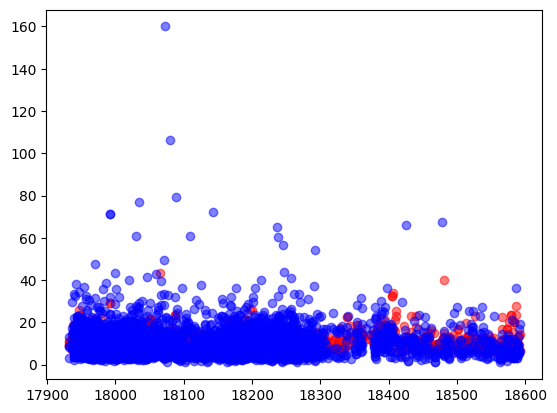

In [208]:
plt.scatter(X_test['IslemTarih'], y_2, alpha=0.5, color="red")
plt.scatter(X_test['IslemTarih'], y_test,  alpha=0.5, color="blue")
plt.show()

In [156]:
x_test_1 = data[data['Marka'] == 14]
x_test_1 = x_test_1.drop("IslemTutar", axis=1)
y_test_1 = data[data['Marka'] == 14].IslemTutar


In [258]:
songun_son_time = data_brand.iloc[-1]['IslemTarih']
songun_ilk_time = songun_son_time-7

In [259]:
base_new_data_test = data_brand[data_brand['IslemTarih'] > songun_ilk_time]

In [265]:
base_new_data_test

,IsyeriTipi,UyeDurum,Sehir,IslemTarih,PaymentTimeCategory,DayOfWeekLabel,DolarTutar
965421,1,1,1,18584.947222,0,6,6.092473
965422,1,1,1,18585.037500,6,4,6.682127
965423,1,1,1,18585.629167,3,4,24.894200
965424,1,1,1,18585.660417,3,4,12.054034
965425,1,1,1,18585.702778,3,4,7.337238
...,...,...,...,...,...,...,...
965481,1,1,1,18591.923611,0,6,2.541587
965482,1,1,1,18591.701389,3,6,19.061900
965483,1,1,1,18591.922222,0,6,11.818378
965484,1,1,1,18591.896528,0,6,6.353967


In [266]:
new_data_test = base_new_data_test.copy()["IslemTarih"]+1

In [267]:
def datasetx(base_new_data_testx, gun):
    base_new_data_testy = base_new_data_testx.copy()
    base_new_data_testy["IslemTarih"] += gun*7
    return base_new_data_testy

In [268]:
datasetx(base_new_data_test, 1)

,IsyeriTipi,UyeDurum,Sehir,IslemTarih,PaymentTimeCategory,DayOfWeekLabel,DolarTutar
965421,1,1,1,18591.947222,0,6,6.092473
965422,1,1,1,18592.037500,6,4,6.682127
965423,1,1,1,18592.629167,3,4,24.894200
965424,1,1,1,18592.660417,3,4,12.054034
965425,1,1,1,18592.702778,3,4,7.337238
...,...,...,...,...,...,...,...
965481,1,1,1,18598.923611,0,6,2.541587
965482,1,1,1,18598.701389,3,6,19.061900
965483,1,1,1,18598.922222,0,6,11.818378
965484,1,1,1,18598.896528,0,6,6.353967


In [269]:
new_data_test = pd.concat([datasetx(base_new_data_test, i) for i in range(1,11)], axis=0)

In [271]:
new_data_test

,IsyeriTipi,UyeDurum,Sehir,IslemTarih,PaymentTimeCategory,DayOfWeekLabel,DolarTutar
965421,1,1,1,18591.947222,0,6,6.092473
965422,1,1,1,18592.037500,6,4,6.682127
965423,1,1,1,18592.629167,3,4,24.894200
965424,1,1,1,18592.660417,3,4,12.054034
965425,1,1,1,18592.702778,3,4,7.337238
...,...,...,...,...,...,...,...
965481,1,1,1,18661.923611,0,6,2.541587
965482,1,1,1,18661.701389,3,6,19.061900
965483,1,1,1,18661.922222,0,6,11.818378
965484,1,1,1,18661.896528,0,6,6.353967


[113.49394   944.36847   691.8267    ...   6.3222413   6.3222413
   6.3222413]


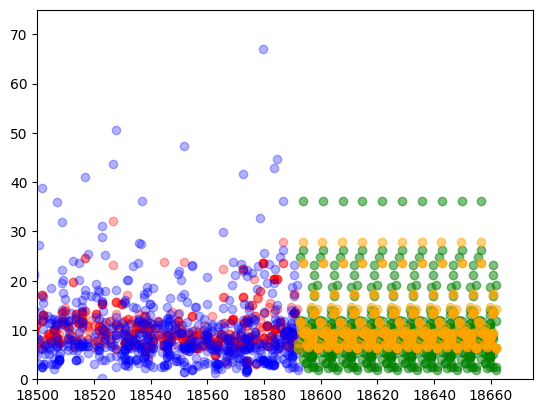

In [274]:
data_test = data_brand
X_test = data_test.drop("DolarTutar", axis=1)
y_test = data_test.DolarTutar
y_2 = xgb.predict(X_test)

X_new_data_test = new_data_test.drop("DolarTutar", axis=1)
y_new_data_test = new_data_test.DolarTutar
y_new_pred = xgb.predict(X_new_data_test)

print(y_2)
plt.scatter(X_test['IslemTarih'], y_2, alpha=0.3, color="red")
plt.scatter(X_test['IslemTarih'], y_test,  alpha=0.3, color="blue")
plt.scatter(X_new_data_test['IslemTarih'], y_new_data_test,  alpha=0.5, color="green")
plt.scatter(X_new_data_test['IslemTarih'], y_new_pred,  alpha=0.5, color="orange")

plt.axis([18500, 18675, 0, 75])
plt.show()

In [278]:
data_brand.head()

,IsyeriTipi,UyeDurum,Sehir,IslemTarih,PaymentTimeCategory,DayOfWeekLabel,DolarTutar
946813,1,1,1,17893.680394,3,0,113.798009
946814,1,1,1,17893.869757,0,0,948.316738
946815,1,1,1,17898.692627,3,6,694.405866
946816,1,1,1,17931.793056,2,1,10.156759
946817,1,1,1,17931.806944,2,1,6.132383


In [277]:
son_islem = new_data_test.iloc[-1].IslemTarih

In [282]:
new_data_test[new_data_test.IslemTarih>son_islem-1].DolarTutar.sum()

41.682022086388535

In [290]:
data.loc[data['UyeDurum'] == 0, 'IsyeriTipi'].nunique()

2

In [298]:
data.loc[data['UyeDurum'] == 'Pasif', 'Marka'].nunique()

17

In [297]:
data.loc[data['UyeDurum'] == 'Aktif', 'Marka'].nunique()

22

In [295]:
data

,Marka,IsyeriTipi,UyeDurum,UyeAdres,Sehir,UyeAktivasyonTarih,IslemTarih,IslemTutar,Tercih
0,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,2015-09-18 14:35:04,5.00,CeptePos
1,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,2019-04-13 13:31:00,32.70,ÖKC
2,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,2019-04-13 19:30:00,998.05,ÖKC
3,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,2019-04-14 13:52:00,105.75,ÖKC
4,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,2019-04-14 15:09:00,163.00,ÖKC
...,...,...,...,...,...,...,...,...,...
999995,Öket özmarket,Şahıs Şirketi,Pasif,ZEYTİNLİ MAH. 79114 NOLU CAD. NO: 1 İÇ KAPI NO...,Gaziantep,2019-01-31 15:47:21,2023-06-09 21:35:00,16.50,ÖKC
999996,Öket özmarket,Şahıs Şirketi,Pasif,ZEYTİNLİ MAH. 79114 NOLU CAD. NO: 1 İÇ KAPI NO...,Gaziantep,2019-01-31 15:47:21,2023-06-09 21:44:00,77.00,ÖKC
999997,Öket özmarket,Şahıs Şirketi,Pasif,ZEYTİNLİ MAH. 79114 NOLU CAD. NO: 1 İÇ KAPI NO...,Gaziantep,2019-01-31 15:47:21,2023-06-09 22:01:00,37.00,ÖKC
999998,Öket özmarket,Şahıs Şirketi,Pasif,ZEYTİNLİ MAH. 79114 NOLU CAD. NO: 1 İÇ KAPI NO...,Gaziantep,2019-01-31 15:47:21,2023-06-09 22:15:00,80.00,ÖKC


In [364]:
df = data

In [314]:
df

,Marka,IsyeriTipi,UyeDurum,Sehir,UyeAktivasyonTarih,IslemTarih,IslemTutar,Tercih,PaymentTimeCategory,DayOfWeekLabel,IslemTutarAnomaly,IslemTarih_Date,DolarTutar,DolarTutarAnomaly
0,Kzar kü pazar,Tüzel Şirket,Aktif,Samsun,2015-09-08 15:08:23,2015-09-18 14:35:04,5.00,CeptePos,Ogle Arası,Friday,5.00,2015-09-18,1.663894,1.663894
1,Kzar kü pazar,Tüzel Şirket,Aktif,Samsun,2015-09-08 15:08:23,2019-04-13 13:31:00,32.70,ÖKC,Ogle Arası,Saturday,32.70,2019-04-13,5.667932,5.667932
2,Kzar kü pazar,Tüzel Şirket,Aktif,Samsun,2015-09-08 15:08:23,2019-04-13 19:30:00,998.05,ÖKC,Is Cıkıs,Saturday,0.00,2019-04-13,172.993257,0.000000
3,Kzar kü pazar,Tüzel Şirket,Aktif,Samsun,2015-09-08 15:08:23,2019-04-14 13:52:00,105.75,ÖKC,Ogle Arası,Sunday,105.75,2019-04-14,18.329780,18.329780
4,Kzar kü pazar,Tüzel Şirket,Aktif,Samsun,2015-09-08 15:08:23,2019-04-14 15:09:00,163.00,ÖKC,Mesai,Sunday,163.00,2019-04-14,28.252994,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,Öket özmarket,Şahıs Şirketi,Pasif,Gaziantep,2019-01-31 15:47:21,2023-06-09 21:35:00,16.50,ÖKC,Aksam,Friday,16.50,2023-06-09,0.705173,0.705173
999996,Öket özmarket,Şahıs Şirketi,Pasif,Gaziantep,2019-01-31 15:47:21,2023-06-09 21:44:00,77.00,ÖKC,Aksam,Friday,77.00,2023-06-09,3.290809,3.290809
999997,Öket özmarket,Şahıs Şirketi,Pasif,Gaziantep,2019-01-31 15:47:21,2023-06-09 22:01:00,37.00,ÖKC,Aksam,Friday,37.00,2023-06-09,1.581298,1.581298
999998,Öket özmarket,Şahıs Şirketi,Pasif,Gaziantep,2019-01-31 15:47:21,2023-06-09 22:15:00,80.00,ÖKC,Aksam,Friday,80.00,2023-06-09,3.419023,3.419023
